# Solving the collision-coalescence ODE with machine learning models

### Load Tensorflow and other useful modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import pathlib

import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
import numpy as np
import xarray as xarray
import os.path

# Load the DNN models

In [3]:
def load_model(model_name):
    filename = 'saved_model_v7/'+model_name
    if os.path.isdir(filename):
        model = tf.keras.models.load_model(filename)
    else:
        print('File not found: '+filename)
        model = False
    return model


In [4]:

#param0='ReLU_16x16x16_big_n5_z12'

#param1='ReLU_16x16x16_big_n5_z15'

param1='ReLU_16x16x16_big_n5_z20'


#param1='tanh_16x16x16_big_n5_z12'
#param1='PReLU_16x16x16_big_n5_z12'
#param1='LReLU_16x16x16_big_n5_z12'
#param1='SELU_16x16x16_big_n5_z12'
#param1='sigm_16x16x16_big_n5_z12'

#param1='tanh_16xx10_big_n5_z12'
#param1='PReLU_16xx10_big_n5_z12'
#param1='ReLU_128xx10_big_n5_z12'

#param1='ReLU_deep_16xx10_big_n5_z12'
#param1='ReLU_wide_and_deep_128xx10_big_n5_z12'


#param1='ReLU_16x16x16_big_n5_z15'
#param1='tanh_16x16x16_big_n5_z11'
#param1='tanh_16x16x16_big_n5_z15'

string_auto1 = 'autocon_LcXcNu_v6_'+param1
string_auto2 = 'autocon_LcXcNuTau_v6_'+param1
string_auto3 = 'autocon_LcXcNuLr_v6_'+param1
string_auto4 = 'autoL2_XcNuTau_v6_'+param1
string_auto5 = 'autoL2nu_XcTau_v6_'+param1
string_auto6 = 'autocon_withN_LcXcNuTau_v6_'+param1

param2='ReLU_16x16x16_big_n5'

string_accr1 = 'accretion_v7_LcLr_'+param2
string_accr2 = 'accretion_v7_LcLrXcXr_'+param2
string_accr3 = 'accretion_v7_LcLrXcXrNu_'+param2

string_selfcloud1 = 'selfcloud_v7_LcXcNu_'+param2
string_selfcloud2 = 'selfcloud_v7_LcXcNuTau_'+param2

string_selfrain1  = 'selfrain_v7_LrXr_'+param2
string_selfrain2  = 'selfrain_v7_LrNr_'+param2
string_selfrain3  = 'selfrain_v7_NrXr_'+param2
string_selfrain4  = 'selfrain_v7_NrXrTau_'+param2

model_auto1 = load_model(string_auto1)
model_auto2 = load_model(string_auto2)
model_auto3 = load_model(string_auto3)
model_auto4 = load_model(string_auto4)
model_auto5 = load_model(string_auto5)
#model_auto6 = load_model(string_auto6)

model_accr1 = load_model(string_accr1)
model_accr2 = load_model(string_accr2)
model_accr3 = load_model(string_accr3)

model_selfcloud1 = load_model(string_selfcloud1)
model_selfcloud2 = load_model(string_selfcloud2)

model_selfrain1  = load_model(string_selfrain1)
model_selfrain2  = load_model(string_selfrain2)
model_selfrain3  = load_model(string_selfrain3)
model_selfrain4  = load_model(string_selfrain4)


In [5]:
# Check its architecture
model_auto5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_25 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [6]:
#model_auto6.summary()

In [7]:
model_accr3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                96        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_selfcloud2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_selfrain4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 17        
Total params: 625
Trainable params: 625
Non-trainable params: 0
_________________________________________________________________


### load normalization as pandas dataframe

In [10]:
def load_normalization(model_name):
    filename = 'saved_model_v7/'+model_name+'_norm.pickle'
    if os.path.isfile(filename):
        norm = pd.read_pickle(filename)
    else:
        print('File not found: '+filename) 
        norm = False
    return norm

In [11]:
norm_auto1 = load_normalization(string_auto1)
norm_auto2 = load_normalization(string_auto2)
norm_auto3 = load_normalization(string_auto3)
norm_auto4 = load_normalization(string_auto4)
norm_auto5 = load_normalization(string_auto5)
#norm_auto6 = load_normalization(string_auto6)

norm_accr1 = load_normalization(string_accr1)
norm_accr2 = load_normalization(string_accr2)
norm_accr3 = load_normalization(string_accr3)

norm_selfcloud1 = load_normalization(string_selfcloud1)
norm_selfcloud2 = load_normalization(string_selfcloud2)

norm_selfrain1  = load_normalization(string_selfrain1)
norm_selfrain2  = load_normalization(string_selfrain2)
norm_selfrain3  = load_normalization(string_selfrain3)
norm_selfrain4  = load_normalization(string_selfrain4)

In [12]:
norm_auto1

count       mean       std        min        25%        50%        75%  \
Lc  223027.0  -8.006578  0.770020 -10.417499  -8.526572  -7.930257  -7.420700   
Xc  223027.0 -25.781116  0.495179 -26.839777 -26.151456 -25.837381 -25.358384   
nu  223027.0   2.092401  1.380275   0.000000   1.000000   2.000000   3.000000   

          max  
Lc  -6.215683  
Xc -24.881920  
nu   4.000000

In [13]:
norm_auto2

count       mean       std        min        25%        50%  \
Lc   223027.0  -8.006578  0.770020 -10.417499  -8.526572  -7.930257   
Xc   223027.0 -25.781116  0.495179 -26.839777 -26.151456 -25.837381   
tau  223027.0  -5.871604  5.005292 -25.195736  -8.776547  -4.632226   
nu   223027.0   2.092401  1.380275   0.000000   1.000000   2.000000   

           75%        max  
Lc   -7.420700  -6.215683  
Xc  -25.358384 -24.881920  
tau  -1.697840  -0.162541  
nu    3.000000   4.000000

In [14]:
norm_auto3

count       mean       std        min        25%        50%        75%  \
Lc  223027.0  -8.006578  0.770020 -10.417499  -8.526572  -7.930257  -7.420700   
Xc  223027.0 -25.781116  0.495179 -26.839777 -26.151456 -25.837381 -25.358384   
Lr  223027.0 -13.659960  5.020826 -31.498377 -16.641255 -12.486954  -9.579693   
nu  223027.0   2.092401  1.380275   0.000000   1.000000   2.000000   3.000000   

          max  
Lc  -6.215683  
Xc -24.881920  
Lr  -6.378722  
nu   4.000000

In [15]:
norm_auto4

count       mean       std        min        25%        50%  \
Xc   223027.0 -25.781116  0.495179 -26.839777 -26.151456 -25.837381   
tau  223027.0  -5.871604  5.005292 -25.195736  -8.776547  -4.632226   
nu   223027.0   2.092401  1.380275   0.000000   1.000000   2.000000   

           75%        max  
Xc  -25.358384 -24.881920  
tau  -1.697840  -0.162541  
nu    3.000000   4.000000

In [16]:
norm_auto5

count       mean       std        min        25%        50%  \
Xc   223027.0 -25.781116  0.495179 -26.839777 -26.151456 -25.837381   
tau  223027.0  -5.871604  5.005292 -25.195736  -8.776547  -4.632226   

           75%        max  
Xc  -25.358384 -24.881920  
tau  -1.697840  -0.162541

In [17]:
#norm_auto6

In [18]:
norm_accr1

count       mean       std        min        25%       50%       75%  \
Lc  390266.0  -9.735505  2.381932 -15.429439 -11.660074 -8.620265 -7.829179   
Lr  390266.0 -11.401494  4.875874 -29.565296 -13.758996 -8.893823 -7.894393   

         max  
Lc -6.215683  
Lr -6.216760

In [19]:
norm_accr2

count       mean       std        min        25%        50%        75%  \
Lc  390266.0  -9.735505  2.381932 -15.429439 -11.660074  -8.620265  -7.829179   
Lr  390266.0 -11.401494  4.875874 -29.565296 -13.758996  -8.893823  -7.894393   
Xc  390266.0 -25.974607  0.650774 -28.920919 -26.412858 -25.963396 -25.502439   
Xr  390266.0 -17.312515  3.806687 -22.069162 -20.987723 -18.102999 -13.829069   

          max  
Lc  -6.215683  
Lr  -6.216760  
Xc -24.881920  
Xr  -9.336143

In [20]:
norm_accr3

count       mean       std        min        25%        50%        75%  \
Lc  390266.0  -9.735505  2.381932 -15.429439 -11.660074  -8.620265  -7.829179   
Lr  390266.0 -11.401494  4.875874 -29.565296 -13.758996  -8.893823  -7.894393   
Xc  390266.0 -25.974607  0.650774 -28.920919 -26.412858 -25.963396 -25.502439   
Xr  390266.0 -17.312515  3.806687 -22.069162 -20.987723 -18.102999 -13.829069   
nu  390266.0   2.085209  1.390925   0.000000   1.000000   2.000000   3.000000   

          max  
Lc  -6.215683  
Lr  -6.216760  
Xc -24.881920  
Xr  -9.336143  
nu   4.000000

In [21]:
norm_selfcloud1

count       mean       std        min        25%        50%        75%  \
Lc  365705.0  -9.091941  1.900657 -15.428405 -10.177835  -8.520574  -7.825369   
Xc  365705.0 -25.938072  0.609480 -28.906904 -26.403944 -25.905914 -25.466192   
nu  365705.0   2.102441  1.390323   0.000000   1.000000   2.000000   3.000000   

          max  
Lc  -6.215683  
Xc -24.881920  
nu   4.000000

In [22]:
norm_selfcloud2

count       mean       std        min        25%        50%  \
Lc   365705.0  -9.091941  1.900657 -15.428405 -10.177835  -8.520574   
Xc   365705.0 -25.938072  0.609480 -28.906904 -26.403944 -25.905914   
nu   365705.0   2.102441  1.390323   0.000000   1.000000   2.000000   
tau  365705.0  -5.309586  6.839194 -30.585890  -8.140707  -2.339488   

           75%        max  
Lc   -7.825369  -6.215683  
Xc  -25.466192 -24.881920  
nu    3.000000   4.000000  
tau  -0.100994  -0.001000

In [23]:
norm_selfrain1

count       mean       std        min        25%        50%        75%  \
Lr  309151.0  -9.263053  2.144214 -16.117336 -10.272721  -8.535312  -7.830037   
Xr  309151.0 -16.217106  3.529209 -22.034079 -19.545470 -16.254799 -13.076881   

         max  
Lr -6.216760  
Xr -9.336143

In [24]:
norm_selfrain2

count      mean       std        min        25%       50%       75%  \
Lr  309151.0 -9.263053  2.144214 -16.117336 -10.272721 -8.535312 -7.830037   
Nr  309151.0  6.954502  2.428800   1.006676   5.133979  7.181265  8.808613   

          max  
Lr  -6.216760  
Nr  13.366846

In [25]:
norm_selfrain3

count       mean       std        min        25%        50%        75%  \
Nr  309151.0   6.954502  2.428800   1.006676   5.133979   7.181265   8.808613   
Xr  309151.0 -16.217106  3.529209 -22.034079 -19.545470 -16.254799 -13.076881   

          max  
Nr  13.366846  
Xr  -9.336143

In [26]:
norm_selfrain4

count       mean       std        min        25%        50%  \
Nr   309151.0   6.954502  2.428800   1.006676   5.133979   7.181265   
Xr   309151.0 -16.217106  3.529209 -22.034079 -19.545470 -16.254799   
tau  309151.0  -1.436393  2.085930  -9.872979  -2.399582  -0.188298   

           75%        max  
Nr    8.808613  13.366846  
Xr  -13.076881  -9.336143  
tau  -0.011117  -0.001000

In [27]:
def norm(x,stats):
  return (x - stats['mean']) / stats['std']

# Define the callable parameterization functions

In [28]:
eps = 1e-12

In [29]:
def autocon1(qc,xc,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','nu' ] 
    normed_data = norm(data,norm_auto1)
    auto = model_auto1.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [30]:
def autocon2(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto2)
    auto = model_auto2.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [31]:
def autocon3(qc,xc,qr,nu):
    qr = np.where(qr < eps,eps,qr)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), np.log(qr.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','Lr','nu' ] 
    normed_data = norm(data,norm_auto3)
    auto = model_auto3.predict(normed_data).flatten()
    return np.exp(np.reshape(auto,qc.shape))

In [32]:
def autocon4(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto4)
    auto = model_auto4.predict(normed_data).flatten()
    auto = qc**2 * np.exp(np.reshape(auto,qc.shape))                 
    return auto

In [33]:
def autocon5(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(xc.ravel()), np.log(tau.ravel()) ]))
    data = data.T
    data.columns = [ 'Xc','tau' ] 
    normed_data = norm(data,norm_auto5)
    auto = model_auto5.predict(normed_data).flatten()
    auto = qc**2 * (nu+2.0)*(nu+4.0)/(nu+1.0)**2 * np.exp(np.reshape(auto,qc.shape))                 
    return auto

In [34]:
def autocon6(qc,xc,qr,nu):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), np.log(tau.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','tau','nu' ] 
    normed_data = norm(data,norm_auto6)
    predict = np.exp(model_auto6.predict(normed_data))
    auL = np.reshape(predict[:,0],qc.shape) 
    auN = np.reshape(predict[:,1],qc.shape) 
    return auL, auN

In [35]:
def selfcloud1(qc,xc,nu):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Xc','nu' ] 
    normed_data = norm(data,norm_selfcloud1)
    self = model_selfcloud1.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qc.shape))

In [36]:
def selfcloud2(qc,xc,nu,qr):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(xc.ravel()), nu.ravel(), np.log(tau.ravel()) ]))
    data = data.T
    data.columns = [ 'Lc','Xc','nu','tau' ] 
    normed_data = norm(data,norm_selfcloud2)
    self = model_selfcloud2.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qc.shape))

In [37]:
def accretion1(qc,qr):
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lc','Lr' ] 
    data.head()
    normed_data = norm(data,norm_accr1)
    accr = model_accr1.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [38]:
def accretion2(qc,qr,xc,xr):
    qr = np.where(qr < eps,eps,qr)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()), np.log(xc.ravel()), np.log(xr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lc','Lr','Xc','Xr' ] 
    data.head()
    normed_data = norm(data,norm_accr2)
    accr = model_accr2.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [39]:
def accretion3(qc,qr,xc,xr,nu):
    qr = np.where(qr < eps,eps,qr)  # make sure we are within the training data
    data = pd.DataFrame(np.array( [ np.log(qc.ravel()), np.log(qr.ravel()), np.log(xc.ravel()), np.log(xr.ravel()), nu.ravel() ]))
    data = data.T
    data.columns = [ 'Lc','Lr','Xc','Xr','nu' ] 
    data.head()
    normed_data = norm(data,norm_accr3)
    accr = model_accr3.predict(normed_data).flatten()
    return np.exp(np.reshape(accr,qc.shape))

In [40]:
def selfrain1(qr,xr):
    xstar = 2.6e-10   # xstar in kg
    qr   = np.where(qr < eps,eps,qr) 
#    xr   = np.where(xr < xstar,xstar,xr) 
    data = pd.DataFrame(np.array( [ np.log(qr.ravel()), np.log(xr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lr','Xr' ] 
    normed_data = norm(data,norm_selfrain1)
    self = model_selfrain1.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qr.shape))

In [41]:
def selfrain2(qr,nr):
    qr   = np.where(qr < eps,eps,qr) 
    data = pd.DataFrame(np.array( [ np.log(qr.ravel()), np.log(nr.ravel()) ]))
    data = data.T
    data.columns = [ 'Lr','Nr' ] 
    normed_data = norm(data,norm_selfrain2)
    self = model_selfrain2.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qr.shape))

In [42]:
def selfrain3(nr,xr):
    nr   = np.where(nr < eps,eps,nr) 
    data = pd.DataFrame(np.array( [ np.log(nr.ravel()), np.log(xr.ravel()) ]))
    data = data.T
    data.columns = [ 'Nr','Xr' ] 
    normed_data = norm(data,norm_selfrain3)
    self = model_selfrain3.predict(normed_data).flatten()
    return np.exp(np.reshape(self,nr.shape))

In [43]:
def selfrain4(nr,xr,qc,qr):
    tau  = qr/(qc+qr)
    tau  = np.where(tau < eps,eps,tau)  # make sure we are within the training data
    nr   = np.where(nr < eps,eps,nr) 
    data = pd.DataFrame(np.array( [ np.log(nr.ravel()), np.log(xr.ravel()), np.log(tau.ravel()) ]))
    data = data.T
    data.columns = [ 'Nr','Xr','tau' ] 
    normed_data = norm(data,norm_selfrain4)
    self = model_selfrain4.predict(normed_data).flatten()
    return np.exp(np.reshape(self,qr.shape))

# SB2001 warm-rain model

In [44]:

kcc = 9.44e9      # Long kernel in m3 kg-2 s-1 
kcr = 5.78        # Long kernel in m3 kg-1 s-1 
krr = 4.33

xstar = 2.6e-10   # xstar in kg
a_phi = 600.
p_phi = 0.68
#a_phi = 954.
#p_phi = 0.773

rhow = 1e3
def drop_mass(drop_radius):
    return 4./3. *np.pi * rhow * drop_radius**3

def autoconSB(qc,xc,nu,qr):
    auto = kcc/(20*xstar) * (nu+2.0)*(nu+4.0)/(nu+1.0)**2 * qc**2 * xc**2
    tau  = qr/(qc+qr+1e-15)
    taup = np.power(tau,p_phi)
    phi  = a_phi * taup * (1.0 - taup)**3
    auto = auto * (1.0+phi)
#    print("  qc=%0.3e"%qc[0,0]+",  xc=%0.3e"%xc[0,0]+",  qr=%0.3e"%qr[0,0]+",  nu=%2.1f"%nu+",  auto=%0.3e"%auto[0,0])
    return auto

def accretionSB(qc,qr):
    tau = qr/(qc+qr)
    phi = (tau / (tau + 5e-4))**4
    acc = kcr * qc * qr * phi
    return acc

def selfcloudSB(qc,nu):
    self = kcc * (nu+2.0)/(nu+1.0) * qc**2
    return self

def selfrainSB(qr,nr):
    self = krr * qr * nr
    return self

# Scalar sanity test of process rate parameterizations

In [45]:
qc = np.array(1.0e-3)
qr = np.array(0.1e-3)
nu = np.array(0.0)
rc = np.array(12e-6)
rr = np.array(100e-6)
xc = drop_mass(rc)
xr = drop_mass(rr)
nc = qc/xc
nr = qr/xr

### autoconversion

In [46]:
autoconSB(qc,xc,nu,qr)

4.725418859437707e-08

In [47]:
autocon1(qc,xc,nu)

1.4983904e-09

In [48]:
autocon2(qc,xc,qr,nu)

8.508238e-08

In [49]:
autocon3(qc,xc,qr,nu)

7.741314e-08

In [50]:
autocon4(qc,xc,qr,nu)

6.190768629312515e-08

In [51]:
autocon5(qc,xc,qr,nu)

2.3280570283532143e-08

In [52]:
#autocon6(qc,xc,qr,nu)

### accretion

In [53]:
accretionSB(qc,qr)

5.654569400551449e-07

In [54]:
accretion1(qc,qr)

5.0380106e-07

In [55]:
accretion2(qc,qr,xc,xr)

5.0981413e-07

In [56]:
accretion3(qc,qr,xc,xr,nu)

5.239452e-07

### selfcollection of cloud droplets

In [57]:
selfcloudSB(qc,nu)

18880.0

In [58]:
selfcloud1(qc,xc,nu)

15477.054

In [59]:
selfcloud2(qc,xc,nu,qr)

16869.766

### selfcollection of raindrops

In [60]:
selfrainSB(qr,nr)

10.3371135538186

In [61]:
selfrain1(qr,xr)

12.543468

In [62]:
selfrain2(qr,nr)

14.485624

In [63]:
selfrain3(nr,xr)

13.058732

In [64]:
selfrain4(nr,xr,qc,qr)


11.515378

# Time loop

In [65]:
dt = 2                   # time step in s 

pAU = 2            # autoconversion

pAC  = 3            # accretion
pSCc = 2            # cloud self-collection
pSCr = 4            # rain self-collection

ltest_scalar = False      # a test-run with a scalar loop mostly for debugging
ltest_loop   = False      # a test-run with a small parameter space

# initial condition
if ltest_scalar:
    ntmax = 10
    qc0 = np.array( 2.0e-3 )
    rc0 = np.array( 13e-6 )
    nu0 = np.array( 1 )
    xc0 = drop_mass(rc0)
elif ltest_loop:
    ntmax = int(720/dt)
    qc0 = np.array( [2.0e-3,5e-3] )
    rc0 = np.array( [13e-6,15e-6] )
    nu0 = np.array( [0,2] )
    xc0 = drop_mass(rc0)
else:
    ntmax = int(10800/dt)
    qc0 = np.array( [0.3e-3,0.5e-3,0.7e-3,1.0e-3,1.5e-3,2e-3] )
    rc0 = np.array( [10e-6, 11e-6, 12e-6, 13e-6, 14e-6, 15e-6] )
    nu0 = np.array( [0,1,2,3,4] )
    xc0 = drop_mass(rc0)

tend = ntmax*dt

if ltest_scalar:
    nqc = 1
    nrc = 1
    nnu = 1
else:
    nqc = len(qc0)
    nrc = len(rc0)
    nnu = len(nu0)
    
dim = nqc*nrc*nnu

models = 2 # only SB2001 and one ML model

qc = np.zeros((models,nqc,nrc,nnu,ntmax))
qr = np.zeros((models,nqc,nrc,nnu,ntmax))
AU = np.zeros((models,nqc,nrc,nnu,ntmax))
AC = np.zeros((models,nqc,nrc,nnu,ntmax))
t10 = np.full((models,nqc,nrc,nnu),tend)
t50 = np.full((models,nqc,nrc,nnu),tend)

# a linear time coordinate
time = np.linspace(0,ntmax*dt,ntmax)

# simple integer coordinate for the models
models = np.array([0,1]) 

print("dim   = %d"%dim)
print("ntmax = %d"%ntmax)

dim   = 180
ntmax = 5400


### Here we integrate the whole 3d parameter space in parallel 

This is more efficient than individual (scalar) calls to the ML models. The downside is that we have to run all simulations over the full time interval and cannot stop when we haved reached t50 or 2*t50. Hence, patience is nevertheless needed. 

In [66]:

MLstring = 'AU%d'%pAU+'AC%d'%pAC+'SCc%d'%pSCc+'SCr%d'%pSCr

Nmin = 1e-15

qr0 = 0.0

for m in range(0,2):    
    print('m = %d'%m+' for '+MLstring) 
    nt = 1
    if m == 0:
        nout = 1000
    else:
        nout = 100
    # initial condition    
    rc3d, Lc3d, nu3d = np.meshgrid(rc0,qc0,nu0)
    Xc3d = 4./3. * 3.14 * rhow * rc3d**3
    Nc3d = Lc3d/Xc3d
    Lr3d = np.full((nqc,nrc,nnu),qr0)
    Nr3d = np.full((nqc,nrc,nnu),Nmin)
    Xr3d = Lr3d/Nr3d
    Xr3d = np.where(Xr3d<xstar,xstar,Xr3d)
    qc[m,:,:,:,0] = Lc3d
    qr[m,:,:,:,0] = Lr3d   
    # start time loop    
    while nt < ntmax:
        if m == 0:
            auto = autoconSB(Lc3d,Xc3d,nu3d,Lr3d)
            accr = accretionSB(Lc3d,Lr3d)
            sc_c = selfcloudSB(Lc3d,nu3d)
            sc_r = selfrainSB(Lr3d,Nr3d)
            autoN = 1.0/xstar*auto
        elif m == 1:
            if pAU == 1:
                auto  = autocon1(Lc3d,Xc3d,nu3d)       # autocon_LcXcNu
                autoN = 1.0/xstar*auto
            elif pAU == 2:
                auto  = autocon2(Lc3d,Xc3d,Lr3d,nu3d)  # autocon_LcXcNuTau 
                autoN = 1.0/xstar*auto
            elif pAU == 3:
                auto  = autocon3(Lc3d,Xc3d,Lr3d,nu3d)  # autocon_LcXcNuLr
                autoN = 1.0/xstar*auto
            elif pAU == 4:
                auto  = autocon4(Lc3d,Xc3d,Lr3d,nu3d)  # autoL2_XcNuTau
                autoN = 1.0/xstar*auto
            elif pAU == 5:
                auto  = autocon5(Lc3d,Xc3d,Lr3d,nu3d)  # autoL2_XcTau
                autoN = 1.0/xstar*auto
            elif pAU == 6:
                auto, autoN = autocon6(Lc3d,Xc3d,Lr3d,nu3d)  # autocon_LcXcNuTau with autoN
            else:
                print("Wrong autoconversion!")
                break
            if pAC == 1:
                accr = accretion1(Lc3d,Lr3d)
            elif pAC == 2:
                accr = accretion2(Lc3d,Lr3d,Xc3d,Xr3d)    
            elif pAC == 3:
                accr = accretion3(Lc3d,Lr3d,Xc3d,Xr3d,nu3d)    
            else:
                print("Wrong accretion!")
                break
            if pSCc == 1:                
                sc_c = selfcloud1(Lc3d,Xc3d,nu3d)        # selfcloud_LcXcNu
            elif pSCc == 2:                
                sc_c = selfcloud2(Lc3d,Xc3d,nu3d,Lr3d)   # selfcloud_LcXcNuTau
            else:
                print("Wrong selfcollection of cloud droplets!")
                break
            if pSCr == 1:    
                sc_r = selfrain1(Lr3d,Xr3d)
            elif pSCr == 2:    
                sc_r = selfrain2(Lr3d,Nr3d)
            elif pSCr == 3:    
                sc_r = selfrain3(Nr3d,Xr3d)
            elif pSCr == 4:    
                sc_r = selfrain4(Nr3d,Xr3d,Lc3d,Lr3d)
            else:
                print("Wrong selfcollection of cloud droplets!")
                break
        # for debugging
        if m == 1 and dim == 1 and np.mod(nt,1) == 0:
            print('   nt=%d'%nt+",  Lc=%0.3e"%Lc3d[0,0,0]+", Lr=%0.3e"%Lr3d[0,0,0]+",  Xc=%0.3e"%Xc3d[0,0,0]+",  Xr=%0.3e"%Xr3d[0,0,0]+', auto=%0.3e'%auto[0,0,0]+", accr=%0.3e"%accr[0,0,0])
        # time integration
        Lc3d = Lc3d - auto*dt - accr*dt
        Lr3d = Lr3d + auto*dt + accr*dt
        Nc3d = Nc3d - accr/Xc3d*dt - sc_c*dt
        if m == 1:
            Nc3d = Nc3d - 2.0*autoN*dt # for SB2001 included in self
        Nr3d = Nr3d + autoN*dt - sc_r*dt
        Xc3d = np.where(Nc3d>Nmin,Lc3d/Nc3d,Lc3d/(Nc3d+Nmin))
        Xr3d = np.where(Nc3d>Nmin,Lr3d/Nr3d,Lr3d/(Nr3d+Nmin))
        # store some arrays
        AU[m,:,:,:,nt] = auto
        AC[m,:,:,:,nt] = accr
        qc[m,:,:,:,nt] = Lc3d
        qr[m,:,:,:,nt] = Lr3d
        # conversion time scales
        t10[m,:,:,:] = np.where(Lr3d < 0.1*Lc3d,time[nt],t10[m,:,:,:])
        t50[m,:,:,:] = np.where(Lr3d < 0.5*Lc3d,time[nt],t50[m,:,:,:])
        # simple stopping mechanism, if all simulations reached t50, we exit the loop
        # (might be useless, if there is a simulation that does not produce rain before tend)
        if np.mod(nt,nout) == 0:
            count = np.count_nonzero(1.3*t50[m,:,:,:] < time[nt])
            print('   nt=%d'%nt+', %4.1f'%(count/dim*100)+" % done")
#            if (1.3*np.max(t50[m,:,:,:]) < time[nt]):
#                break        
        nt = nt+1
print('Done!')      

m = 0 for AU2AC3SCc2SCr4
   nt=1000, 34.4 % done
   nt=2000, 66.1 % done
   nt=3000, 80.6 % done
   nt=4000, 88.9 % done
   nt=5000, 93.3 % done
m = 1 for AU2AC3SCc2SCr4
   nt=100,  0.0 % done
   nt=200,  0.0 % done
   nt=300,  0.0 % done
   nt=400,  1.1 % done
   nt=500,  3.9 % done
   nt=600,  7.2 % done
   nt=700, 11.1 % done
   nt=800, 16.1 % done
   nt=900, 21.7 % done
   nt=1000, 24.4 % done
   nt=1100, 28.9 % done


/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in greater
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: RuntimeWarning: invalid value encountered in greater
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:98: RuntimeWarning: invalid value encountered in less
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in less
/Volumes/MyBook/opt/anaconda3/lib/python3.7/site-packages/ipykernel_laun

   nt=1200, 34.4 % done
   nt=1300, 37.8 % done
   nt=1400, 41.7 % done
   nt=1500, 45.0 % done
   nt=1600, 47.2 % done
   nt=1700, 51.1 % done
   nt=1800, 53.3 % done
   nt=1900, 54.4 % done
   nt=2000, 56.7 % done
   nt=2100, 59.4 % done
   nt=2200, 61.1 % done
   nt=2300, 63.3 % done
   nt=2400, 65.0 % done
   nt=2500, 66.7 % done
   nt=2600, 68.9 % done
   nt=2700, 69.4 % done
   nt=2800, 70.6 % done
   nt=2900, 72.8 % done
   nt=3000, 74.4 % done
   nt=3100, 75.6 % done
   nt=3200, 76.7 % done
   nt=3300, 77.8 % done
   nt=3400, 78.9 % done
   nt=3500, 80.0 % done
   nt=3600, 80.6 % done
   nt=3700, 81.7 % done
   nt=3800, 82.2 % done
   nt=3900, 82.2 % done
   nt=4000, 83.3 % done
   nt=4100, 84.4 % done
   nt=4200, 85.6 % done
   nt=4300, 86.1 % done
   nt=4400, 86.7 % done
   nt=4500, 87.2 % done
   nt=4600, 88.3 % done
   nt=4700, 88.3 % done
   nt=4800, 88.9 % done
   nt=4900, 88.9 % done
   nt=5000, 89.4 % done
   nt=5100, 89.4 % done
   nt=5200, 90.6 % done
   nt=5300, 92.2

In [67]:
t10.shape

(2, 6, 6, 5)

In [68]:
#t50

# Convert to xarray dataset and write to netcdf

In [69]:
models = [0,1]

qr_data = xarray.DataArray(qr,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='qr')
qc_data = xarray.DataArray(qc,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='qc')
au_data = xarray.DataArray(AU,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='au')
ac_data = xarray.DataArray(AC,dims=('model','qc0','rc0','nu0','time'),coords=[models,qc0,rc0,nu0,time], name='ac')

t10_data = xarray.DataArray(t10,dims=('model','qc0','rc0','nu0'),coords=[models,qc0,rc0,nu0], name='t10')
t50_data = xarray.DataArray(t10,dims=('model','qc0','rc0','nu0'),coords=[models,qc0,rc0,nu0], name='t50')

qr_data.attrs['long_name'] = 'rain water content'
qc_data.attrs['long_name'] = 'cloud water content'
au_data.attrs['long_name'] = 'autoconversion rate'
ac_data.attrs['long_name'] = 'accretion rate'

t10_data.attrs['long_name'] = 'conversion time scale t10'
t50_data.attrs['long_name'] = 'conversion time scale t50'

qc0_data = xarray.DataArray(qc0,dims='qc0',coords=[qc0],name='qc0')
qc0_data.attrs['long_name'] = 'initial cloud water content'

rc0_data = xarray.DataArray(rc0,dims='rc0',coords=[rc0],name='rc0')
rc0_data.attrs['long_name'] = 'initial cloud water mean radius'

nu0_data = xarray.DataArray(nu0,dims='nc0',coords=[nu0],name='nu0')
nu0_data.attrs['long_name'] = 'initial cloud shape parameter'

qr_data.attrs['units'] = 'kg/m3'
qc_data.attrs['units'] = 'kg/m3'
qc0_data.attrs['units'] = 'kg/m3'
t10_data.attrs['units'] = 's'
t50_data.attrs['units'] = 's'

t10_data.attrs['param1'] = param1
t10_data.attrs['param2'] = param2
t10_data.attrs['dt'] = dt
t10_data.attrs['ntmax'] = ntmax

ds = xarray.merge([ qc_data, qr_data, t10_data, t50_data, au_data, ac_data ])

In [70]:
filename = 'ode_out_v7/WarmRainODE_'+MLstring+'_AU_'+param1+'_ACSC_'+param2+'_dt%d'%dt+'.nc'
ds.to_netcdf(filename)

# Parameter space plots of t10 and t50

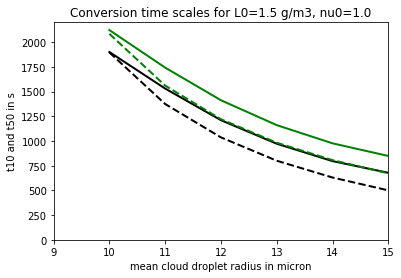

In [71]:

# chose initial liquid water content 
ii=4
nn=1

plt.plot(rc0*1e6, t10[0,ii,:,nn], 'k--', linewidth=2)
plt.plot(rc0*1e6, t10[1,ii,:,nn], 'k-', linewidth=2)
plt.plot(rc0*1e6, t50[0,ii,:,nn], 'g--', linewidth=2)
plt.plot(rc0*1e6, t50[1,ii,:,nn], 'g-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales for L0=%3.1f'%Lini+' g/m3, nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 and t50 in s')
plt.xlabel('mean cloud droplet radius in micron')

plt.xlim(9,15)  # 9 micron was not in the training data  
plt.ylim(0,2200)

plt.yscale('linear')
plt.xscale('linear')
plt.show()

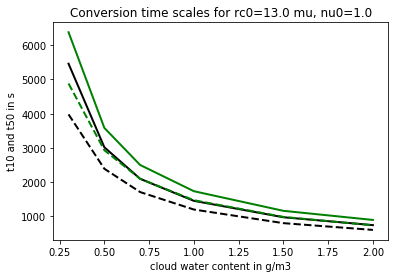

In [72]:

# chose initial drop radius
jj=3

plt.plot(qc0*1e3, t10[0,:,jj,nn], 'k--', linewidth=2)
plt.plot(qc0*1e3, t10[1,:,jj,nn], 'k-', linewidth=2)
plt.plot(qc0*1e3, t50[0,:,jj,nn], 'g--', linewidth=2)
plt.plot(qc0*1e3, t50[1,:,jj,nn], 'g-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[jj]*1e6

plt.title('Conversion time scales for rc0=%3.1f'%Rini+' mu, nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 and t50 in s')
plt.xlabel('cloud water content in g/m3')

plt.yscale('linear')
plt.xscale('linear')
plt.show()

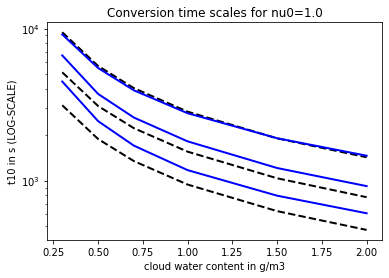

In [73]:
for jj in range(0,nrc,2):
    plt.plot(qc0*1e3, t10[0,:,jj,nn], 'k--', linewidth=2)
    plt.plot(qc0*1e3, t10[1,:,jj,nn], 'b-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[jj]*1e6

plt.title('Conversion time scales for nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 in s (LOG-SCALE)')
plt.xlabel('cloud water content in g/m3')

plt.yscale('log')
plt.xscale('linear')
plt.show()

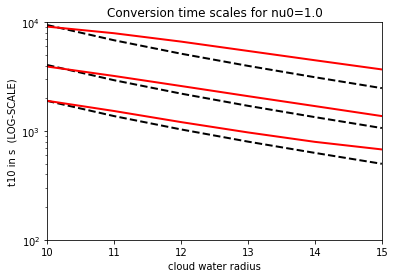

In [74]:
for ii in range(0,nqc,2):
    plt.plot(rc0*1e6, t10[0,ii,:,nn], 'k--', linewidth=2)
    plt.plot(rc0*1e6, t10[1,ii,:,nn], 'r-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales for nu0=%2.1f'%nu0[nn])

plt.ylabel('t10 in s  (LOG-SCALE)')
plt.xlabel('cloud water radius')

plt.xlim(10,15)  # 9 micron was not in the training data  
plt.ylim(100,1e4)

plt.yscale('log')
plt.xscale('linear')
plt.show()

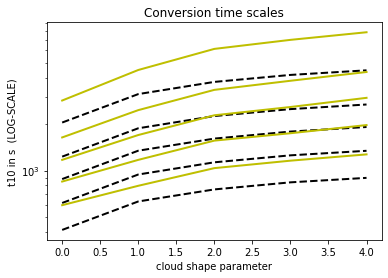

In [75]:
for ii in range(0,nnu,1):
    plt.plot(nu0, t10[0,ii,jj,:], 'k--', linewidth=2)
    plt.plot(nu0, t10[1,ii,jj,:], 'y-', linewidth=2)

Lini = qc0_data[ii]*1e3

plt.title('Conversion time scales')

plt.ylabel('t10 in s  (LOG-SCALE)')
plt.xlabel('cloud shape parameter')

plt.yscale('log')
plt.xscale('linear')
plt.show()

# Some quick time series plots

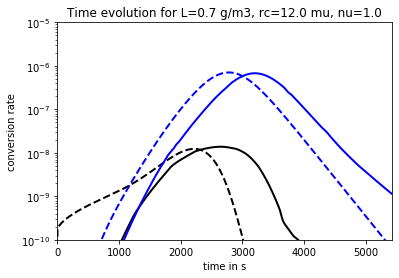

In [76]:

jj=2
ii=2
nn=1

xmax = 1.8 * np.max(t50[:,jj,ii,nn])
qmax = qc0_data[jj]

plt.plot(time, AU[0,jj,ii,nn,:], 'k--', linewidth=2)
plt.plot(time, AU[1,jj,ii,nn,:], 'k-', linewidth=2)
plt.plot(time, AC[0,jj,ii,nn,:], 'b--', linewidth=2)
plt.plot(time, AC[1,jj,ii,nn,:], 'b-', linewidth=2)

Lini = qc0_data[jj]*1e3
Rini = rc0_data[ii]*1e6
NUini = nu0_data[nn]

plt.title('Time evolution for L=%3.1f'%Lini+' g/m3, rc=%3.1f'%Rini+' mu, nu=%2.1f'%NUini)
plt.xlabel('time in s')
plt.ylabel('conversion rate')
plt.ylim(1e-10,1e-5)  
plt.xlim(0,xmax)  

plt.yscale('log')
plt.xscale('linear')
plt.show()

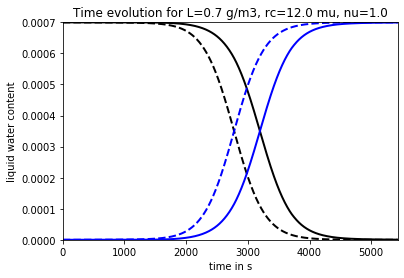

In [77]:
plt.plot(time, qc_data[0,jj,ii,nn,:], 'k--', linewidth=2)
plt.plot(time, qc_data[1,jj,ii,nn,:], 'k-', linewidth=2)
plt.plot(time, qr_data[0,jj,ii,nn,:], 'b--', linewidth=2)
plt.plot(time, qr_data[1,jj,ii,nn,:], 'b-', linewidth=2)

plt.title('Time evolution for L=%3.1f'%Lini+' g/m3, rc=%3.1f'%Rini+' mu, nu=%2.1f'%NUini)
plt.xlabel('time in s')
plt.ylabel('liquid water content')
plt.ylim(0,qmax)  
plt.xlim(0,xmax)  

plt.yscale('linear')
plt.xscale('linear')
plt.show()